<a href="https://www.kaggle.com/code/saibhossain/introduction-to-data-mining?scriptVersionId=288668622" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Introduction to Data mining

What is Data Mining?

Data mining is the process of searching and analyzing a large batch of raw data in order to
identify patterns and extract useful information.

Data mining is used to explore large data volumes to find patterns and insights that can be used
for specific purposes. These purposes might include improving sales and marketing, optimizing
manufacturing, detecting fraud, and enhancing security.

Why Do We Use Data Mining?

We are currently living in the "Information Age," where we generate terabytes of data daily (social media, medical sensors, transaction logs). However, data is not knowledge.

We use Data Mining to bridge the gap between Data (raw numbers) and Wisdom (actionable decisions).

1. Handling the "Data Deluge"

Human analysts cannot manually sift through millions of records. Data mining automates the process of finding "needles in the haystack."

2. Predictive Power

Instead of just analyzing what happened (Descriptive Analytics), data mining allows us to predict what will happen (Predictive Analytics).

Example: Predicting if a lung tumor is malignant or benign based on Radiomics features before a biopsy.

3. Business & Efficiency

Market Basket Analysis: Retailers (like Amazon) use it to discover that people who buy specific laptops also buy specific mouse pads, driving recommendation engines.

Fraud Detection: Banks use anomaly detection to spot credit card theft in real-time.

4. Scientific Discovery

In your field (AI & Medical Imaging), data mining is crucial for Feature Extraction.

**For Example (Medical Research):**
Radiomics: You mine CT scan images to extract thousands of quantitative features (texture, intensity, shape) that the human eye cannot see, correlating them with gene mutations or survival rates.

Core Data Mining Tasks

When we "mine" data, we generally perform one of these four theoretical tasks:

| Task          | Description                                                                 | Example                                                                 |
|---------------|-----------------------------------------------------------------------------|-------------------------------------------------------------------------|
| Classification| Assigning items to predefined categories (Supervised).                     | Spam vs. Non-Spam; Cancer vs. Non-Cancer.                              |
| Clustering    | Grouping similar items together without predefined categories (Unsupervised).| Grouping patients by similar symptoms to discover a new disease subtype.|
| Association   | Finding rules that describe relationships between data items.               | "If a user buys Bread and Milk, they are 80% likely to buy Eggs."      |
| Regression    | Predicting a continuous numerical value.                                    | Predicting the survival time (in months) of a patient.                 |

## Description: This script demonstrates the essential steps of data preprocessing:
     1. Loading Data
     2. Handling Missing Values
     3. Encoding Categorical Data
     4. Splitting the Dataset
     5. Feature Scaling

In [34]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

> We will create a small dataset representing patient data for a medical study.

>Features: Age (Num), Salary (Num), Country (Cat), Purchased_Plan (Target)

In [35]:
# ==========================================
# STEP 1: CREATE A DUMMY DATASET
# ==========================================

data = {
    'Country': ['France', 'Spain', 'Germany', 'Spain', 'Germany', 'France', 'Spain', 'France', 'Germany', 'France'],
    'Age': [44, 27, 30, 38, 40, 35, np.nan, 48, 50, 37],
    'Salary': [72000, 48000, 54000, 61000, np.nan, 58000, 52000, 79000, 83000, 67000],
    'Purchased_Plan': ['No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes']
}

print (data)

{'Country': ['France', 'Spain', 'Germany', 'Spain', 'Germany', 'France', 'Spain', 'France', 'Germany', 'France'], 'Age': [44, 27, 30, 38, 40, 35, nan, 48, 50, 37], 'Salary': [72000, 48000, 54000, 61000, nan, 58000, 52000, 79000, 83000, 67000], 'Purchased_Plan': ['No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes']}


### 1. Loading Data

In [36]:
df = pd.DataFrame(data)

print("--- ORIGINAL DATASET ---")
print(df)
print("\n")

--- ORIGINAL DATASET ---
   Country   Age   Salary Purchased_Plan
0   France  44.0  72000.0             No
1    Spain  27.0  48000.0            Yes
2  Germany  30.0  54000.0             No
3    Spain  38.0  61000.0             No
4  Germany  40.0      NaN            Yes
5   France  35.0  58000.0            Yes
6    Spain   NaN  52000.0             No
7   France  48.0  79000.0            Yes
8  Germany  50.0  83000.0             No
9   France  37.0  67000.0            Yes




/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


In [37]:
# Separate Features (X) and Target (y)

X = df.iloc[:, :-1].values # X contains Country, Age, Salary
y = df.iloc[:, -1].values   # y contains Purchased_Plan



In [38]:
print(X)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 nan]
 ['France' 35.0 58000.0]
 ['Spain' nan 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]


In [39]:
print(y)

['No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes']


###  2. Handling Missing Values

Strategy: Replace missing numerical values (NaN) with the 'mean' of the column.

In [40]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

print(imputer)

SimpleImputer()


We used **SimpleImputer** to fill the missing Age and Salary with the average (mean) of the existing data. This preserves the statistical distribution of the dataset.

In [41]:
# Apply to columns 1 and 2 (Age and Salary)

imputer.fit(X[:, 1:3])           # Note: Column 0 is 'Country'(String), so we skip it here.
X[:, 1:3] = imputer.transform(X[:, 1:3])

print("--- AFTER MISSING VALUE IMPUTATION ---")
print(X,"\n")

--- AFTER MISSING VALUE IMPUTATION ---
[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 63777.77777777778]
 ['France' 35.0 58000.0]
 ['Spain' 38.77777777777778 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]] 



###  3. Encoding Categorical Data

Machine Learning models only understand numbers, not text like 'France' or 'Yes'.

A. Independent Variable (Country) -> One Hot Encoding.

We convert 'France', 'Spain', 'Germany' into binary vectors to avoid mathematical hierarchy.

(France = [1, 0, 0], Spain = [0, 0, 1]...)

In [42]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

print("--- AFTER ONE HOT ENCODING (Country) ---")
print(X,"\n")

--- AFTER ONE HOT ENCODING (Country) ---
[[1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [0.0 1.0 0.0 30.0 54000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 1.0 0.0 40.0 63777.77777777778]
 [1.0 0.0 0.0 35.0 58000.0]
 [0.0 0.0 1.0 38.77777777777778 52000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 37.0 67000.0]] 



In [43]:
le = LabelEncoder()
y = le.fit_transform(y)

print("--- AFTER LABEL ENCODING (Target) ---")
print(y,"\n")

--- AFTER LABEL ENCODING (Target) ---
[0 1 0 0 1 1 0 1 0 1] 



### 4.Splitting the Dataset

We split data into Training set (80%) and Test set (20%)
random_state=1 ensures we get the same split every time we run the code.

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

print(f"Training Set Size: {len(X_train)}")
print(f"Test Set Size: {len(X_test)}")
print("\n")

Training Set Size: 8
Test Set Size: 2




###  5. Feature Scaling

Standard Scaling (Z-score Normalization):

* Centers the data around 0 with a standard deviation of 1.
* This prevents high values (like Salary 72000) from dominating low values (like Age 44).

In [45]:
scaler = StandardScaler()

X_train[:, 3:] = scaler.fit_transform(X_train[:, 3:])
X_test[:, 3:] = scaler.transform(X_test[:, 3:])

print("--- FINAL PREPROCESSED TRAINING DATA (First 3 rows) ---")
print(X_train[:3])

--- FINAL PREPROCESSED TRAINING DATA (First 3 rows) ---
[[0.0 0.0 1.0 -0.19159184384578545 -1.0781259408412425]
 [0.0 1.0 0.0 -0.014117293757057777 -0.07013167641635372]
 [1.0 0.0 0.0 0.566708506533324 0.633562432710455]]


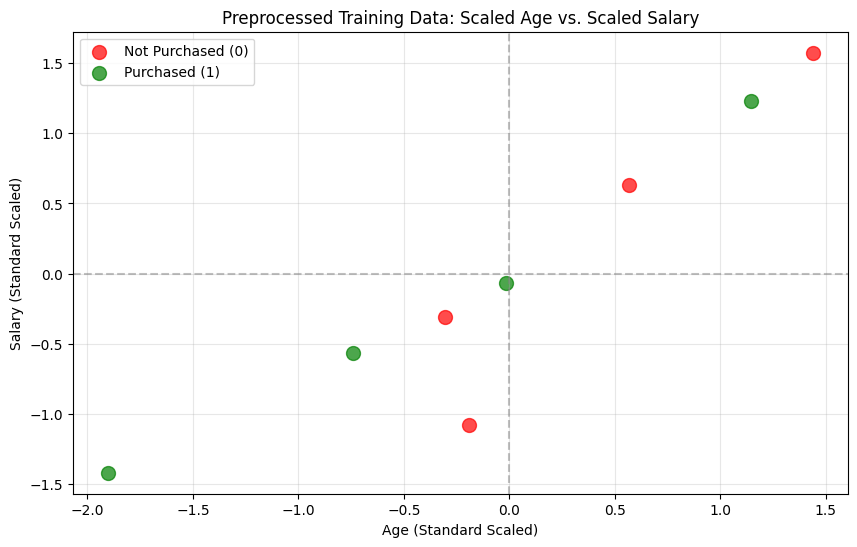

In [46]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Scatter plot for class 0 (No)
plt.scatter(X_train[y_train == 0, 3], X_train[y_train == 0, 4], 
            color='red', label='Not Purchased (0)', s=100, alpha=0.7)

# Scatter plot for class 1 (Yes)
plt.scatter(X_train[y_train == 1, 3], X_train[y_train == 1, 4], 
            color='green', label='Purchased (1)', s=100, alpha=0.7)

plt.title('Preprocessed Training Data: Scaled Age vs. Scaled Salary')
plt.xlabel('Age (Standard Scaled)')
plt.ylabel('Salary (Standard Scaled)')
plt.axhline(0, color='gray', linestyle='--', alpha=0.5)
plt.axvline(0, color='gray', linestyle='--', alpha=0.5)
plt.legend()
plt.grid(True, alpha=0.3)

# Save the figure
plt.savefig('preprocessed_data_plot.png')